# SHINJINI DAS

## Data Science and Business Analytics Intern

## GRIP - The Sparks Foundation

## Task 2: Prediction using Unsupervised Machine Learning

### About Iris Data set:

#### The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 as an example of linear discriminant analysis. The dataset contains a set of 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. Iris data set gives the measurements in centimetres of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica.





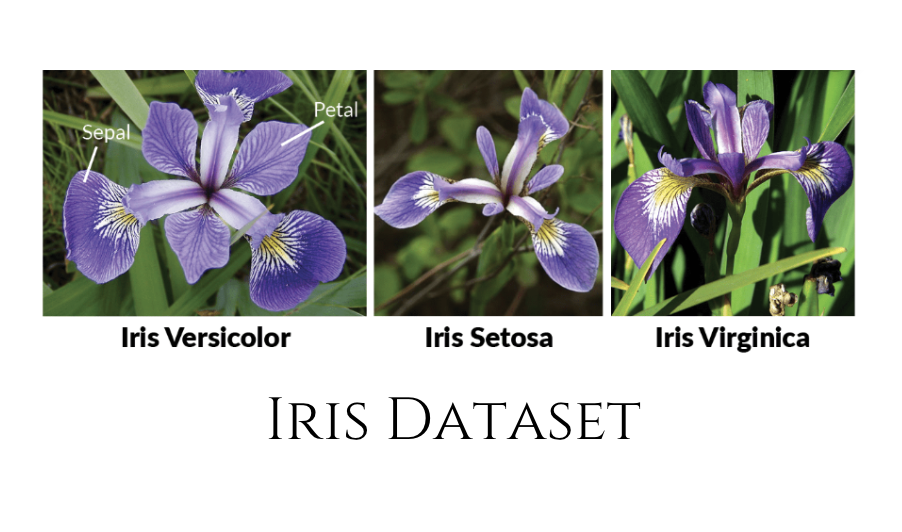

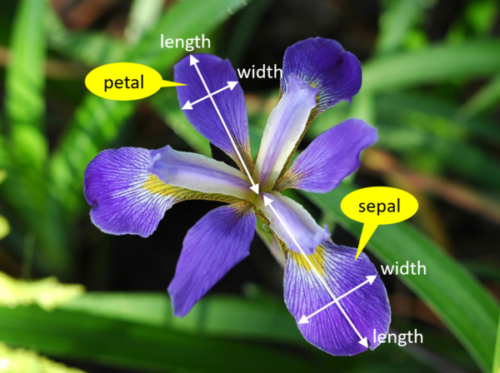


### OBJECTIVE:

#### The Objective is to predict the optimum number of clusters by using the k-means clustering method and represent it visually from the given Iris dataset.


### Importing all relevant Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

### Reading data from remote link

In [3]:
#importing the dataset
data =pd.read_csv("Iris Data.csv")
data
'Data Imported Successfully'

'Data Imported Successfully'

In [4]:
data.head()   # printing head( first few rows) of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Explore the Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### The most important information obtained is that there is no null values in the data set. 

### Statistical Details

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualizing the Data

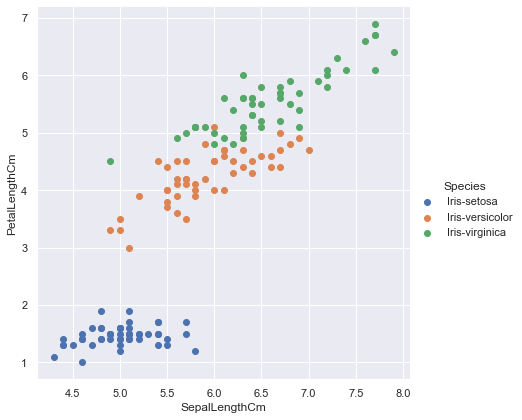

In [8]:
# Graph with background grid
sns.set_style("darkgrid")

# Scatter Plot of Iris data
sns.FacetGrid(data, hue ="Species",  
              height = 6).map(plt.scatter,  
                              'SepalLengthCm',  
                              'PetalLengthCm').add_legend()

#### On visualizing the data, we can find the data points to be grouped in some places. This implies that if we apply Cluster Analysis, we can obtain a valid result of the data being clustered at some places.

## k-means Clustering


#### k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [9]:
# Selecting machine learning algorithm as k-Means
from sklearn.cluster import KMeans

x = data.iloc[:, [0, 1, 2, 3]].values

In [11]:
# Calculate the squared of distances of data points to centroids
# Determine optimal number of clusters
sum_of_squared_distance = []
K = range(1,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k

print("Optimal Number of Clusters =",optimalK)

Optimal Number of Clusters = 3


#### Now the Elbow Graph will be plotted to visually represent the optimal number of clusters.

## Elbow Graph

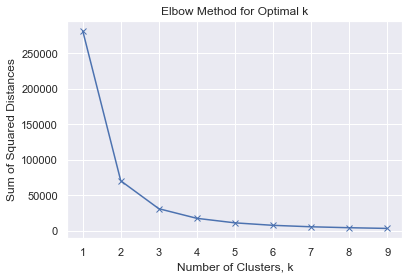

In [12]:
# Plotting Elbow Graph
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

#### The above plot is called the Elbow Method because the optimum clusters is where the elbow occurs. Thus this is the point when the within cluster sum of squares does not decrease significantly with every iteration.

Therefore, we choose the number of clusters for this data set to be 3.

In [13]:
# Applying kmeans to the dataset/creating the kmeans classifier

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552]])

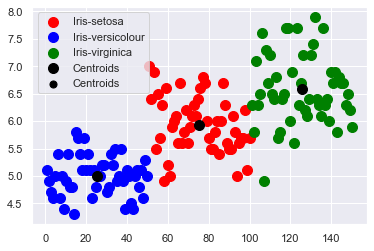

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.legend()

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'Centroids')
plt.legend()

#### The Scatter Plot shows clearly the 3 clusters, represented by RED for Setosa, BLUE for Versicolor and GREEN for Virginica. The Centroids of each cluster are represented by BLACK .



# Final Conclusion:

### The Iris data set was found to be divided into 3 clusters by not only using the k-means algorithm but also visually.



## End of Task 2. Thank You!!